In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import csv
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA,IncrementalPCA, FactorAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

plt.rcParams['figure.figsize'] = [10, 5]
%matplotlib inline

In [2]:
apptrain=pd.read_csv("modedapptrain.csv")

In [4]:
apptrain.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,100002,1,1,1,0,1,0,202500.0,406597.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,100003,0,1,0,0,0,0,270000.0,1293502.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,100004,0,2,1,1,1,0,67500.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,100006,0,1,0,0,1,0,135000.0,312682.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,100007,0,1,1,0,1,0,121500.0,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
apptrain.drop("Unnamed: 0", axis=1, inplace=True)

In [10]:
apptrain.drop(apptrain[apptrain["AMT_ANNUITY"].isnull()].index,inplace=True)

In [15]:
a=(((apptrain.isnull().sum()/apptrain.shape[0])*100)).sort_values(ascending=False)
a[a>0]

Series([], dtype: float64)

In [16]:
apptrain.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,1,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,1,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,2,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,1,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,1,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(apptrain.drop("TARGET",axis=1), apptrain["TARGET"], test_size=0.33, random_state=42)

In [7]:
from imblearn.over_sampling import SMOTE

In [8]:
sm=SMOTE(random_state=15,ratio='minority')

In [11]:
x_res,y_res=sm.fit_sample(X=apptrain.drop("TARGET",axis=1),y=apptrain["TARGET"])

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rfclf = RandomForestClassifier(n_estimators=30,random_state=12)


In [19]:
rfclf.fit(X_train1, y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [20]:
rfpred=rfclf.predict(X_test1)

In [21]:
roc_curve(y_test1,rfpred)

(array([0.00000000e+00, 4.32355947e-04, 1.00000000e+00]),
 array([0.        , 0.00364964, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [ ]:
probs = rfclf.predict_proba(X_test1)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test1, preds)
roc_auc = auc(fpr, tpr)

Text(0.5,0,'False Positive Rate')

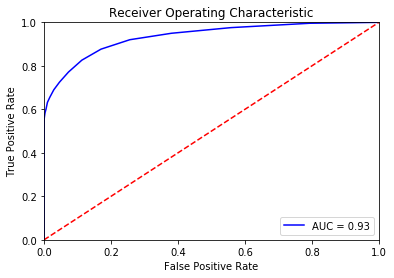

In [34]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.show()

In [68]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_res, y_res, test_size=0.33, random_state=42)

In [69]:
rfclf.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [70]:
rfpred2=rfclf.predict(X_test2)

In [71]:
rfpred2.shape

(50815,)

In [73]:
X_test2.shape

(50815, 121)

In [107]:
a=pd.DataFrame(X_test2[:,0])

In [111]:
a.head()

,0
0,127584.000000
1,187554.000000
2,168024.000000
3,131180.620732
4,164772.000000


In [81]:
dd.keys()

dict_keys(['SKID', 'PREDICTIONS'])

In [ ]:
dd={"SKID":int(a),"PREDICTIONS":rfpred2}

In [93]:
finalsum=pd.DataFrame(dd,columns=dd.keys())

In [95]:
finalsum.head()

,SKID,PREDICTIONS
0,127584.000000,0
1,187554.000000,0
2,168024.000000,0
3,131180.620732,1
4,164772.000000,0


In [97]:
apptrain[apptrain["SK_ID_CURR"]==127584]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
23706,127584,0,1,0,0,1,0,67500.0,101880.0,12217.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
roc_curve(y_test2,rfpred2)

(array([0.00000000e+00, 7.47442958e-04, 1.00000000e+00]),
 array([0.        , 0.91329002, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [112]:
probs = rfclf.predict_proba(a)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test2, preds)
roc_auc = auc(fpr, tpr)

Text(0.5,0,'False Positive Rate')

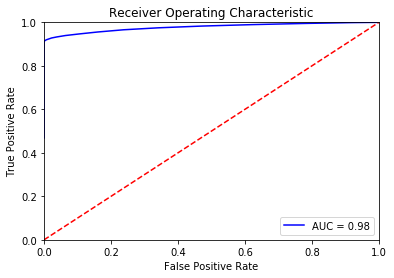

In [113]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [115]:
a=pd.DataFrame(X_test2[:,0])

In [119]:
dd={"SKID":X_test2[:,0],"PREDICTIONS":preds}

In [120]:
finalsum=pd.DataFrame(dd,columns=dd.keys())

In [121]:
finalsum.head()

,SKID,PREDICTIONS
0,127584.000000,0.033333
1,187554.000000,0.100000
2,168024.000000,0.166667
3,131180.620732,0.833333
4,164772.000000,0.100000


Text(0.5,0,'False Positive Rate')

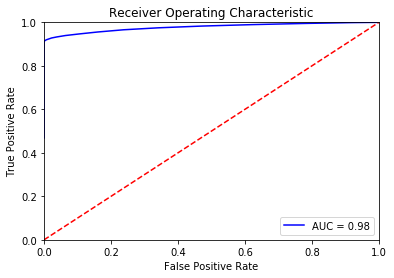

In [49]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [50]:
from sklearn.neural_network import MLPClassifier

In [51]:
nnMLPclf = MLPClassifier(solver='adam',activation='relu' ,alpha=1e-5, learning_rate='adaptive', hidden_layer_sizes=(1000,), random_state=1,warm_start=True , max_iter=1)

In [52]:
nnMLPclf.fit(X_train1, y_train1)

D:\product\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=1, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=True)

In [53]:
nnpred1=nnMLPclf.predict(X_test1)

In [55]:
probs = nnMLPclf.predict_proba(X_test2)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test2, preds)
roc_auc = auc(fpr, tpr)

Text(0.5,0,'False Positive Rate')

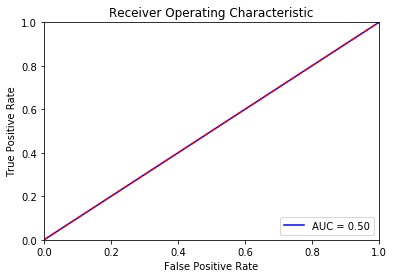

In [56]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [57]:
nnMLPclf.fit(X_train2, y_train2)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=1, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=True)

In [59]:
nnpred2=nnMLPclf.predict(X_test2)

In [60]:
probs = nnMLPclf.predict_proba(X_test2)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test2, preds)
roc_auc = auc(fpr, tpr)

Text(0.5,0,'False Positive Rate')

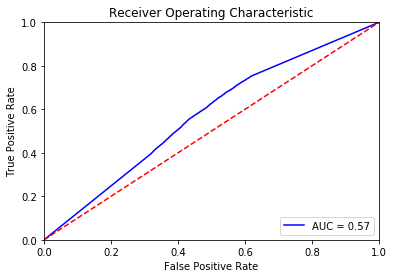

In [61]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# with apptest

In [122]:
apptest=pd.read_csv("application_test.csv")

In [123]:
rfMain = RandomForestClassifier(n_estimators=30,random_state=12)


In [124]:
probsmain = rfclf.predict_proba(apptest)


ValueError: could not convert string to float: 'No'